In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
df.shape

(8807, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
column = ['type', 'rating']

for col in column:
    print(col, df[col].unique())

type ['Movie' 'TV Show']
rating ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' nan 'NR' 'TV-Y7-FV' 'UR']


In [11]:
encoded_df = pd.get_dummies(df, columns=['type'], prefix=['type'])
encoded_df['is_movie'] = encoded_df['type_Movie']
encoded_df = encoded_df.drop(columns=['type_Movie', 'type_TV Show'])
encoded_df.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,is_movie
0,s1,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1
1,s2,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0
2,s3,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0
3,s4,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0
4,s5,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0


In [12]:
encoded_df['director'].fillna('Unknown', inplace=True)
encoded_df['cast'].fillna('Unknown', inplace=True)
encoded_df['country'].fillna('Unknown', inplace=True)
encoded_df['date_added'].fillna('Unknown', inplace=True)
rating_mode = encoded_df['rating'].mode()[0]
encoded_df['rating'].fillna(rating_mode, inplace=True)

encoded_df.isnull().sum()

show_id         0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
is_movie        0
dtype: int64

In [13]:
drops = ['show_id', 'director', 'cast', 'date_added', 'release_year']

encoded_df = encoded_df.drop(columns = drops)
encoded_df.head()

,title,country,rating,duration,listed_in,description,is_movie
0,Dick Johnson Is Dead,United States,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1
1,Blood & Water,South Africa,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0
2,Ganglands,Unknown,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0
3,Jailbirds New Orleans,Unknown,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0
4,Kota Factory,India,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0


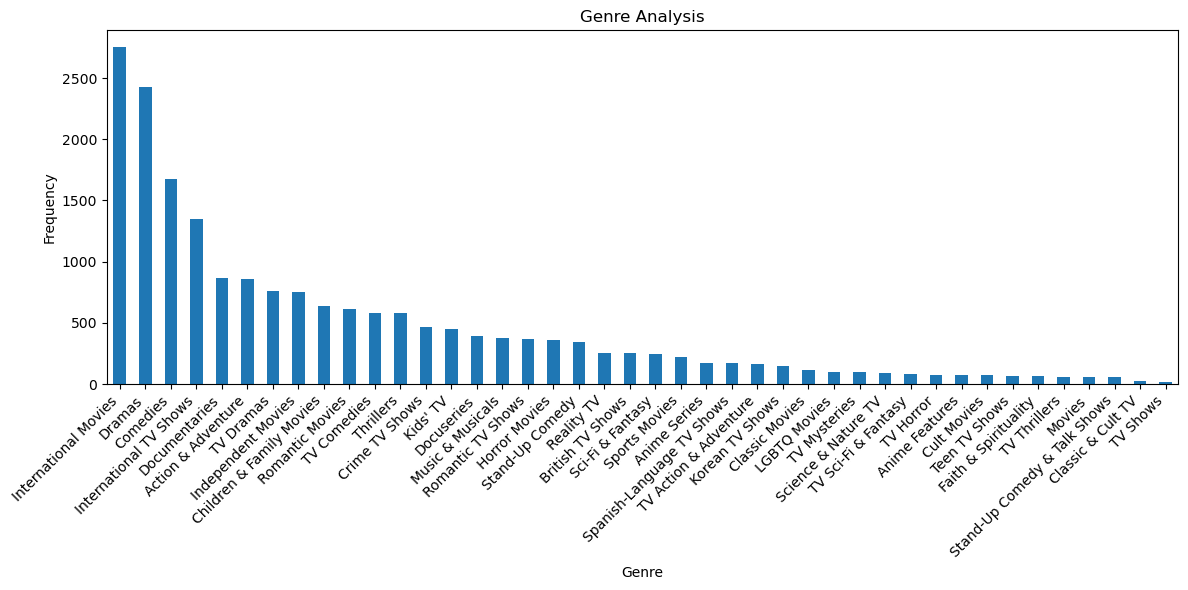

In [34]:
import matplotlib.pyplot as plt

all_genres = []
for genres in encoded_df['listed_in']:
    all_genres.extend(genres.split(', '))
    
genre_series = pd.Series(all_genres)
genre_counts = genre_series.value_counts()

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Genre Analysis')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

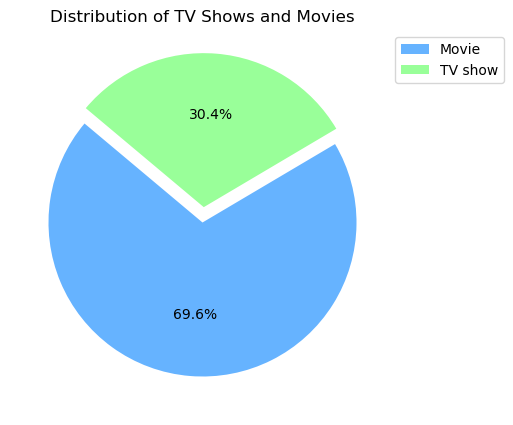

In [36]:
content_type_counts = encoded_df['is_movie'].value_counts()

plt.figure(figsize=(5, 5))
labels = ['Movie', 'TV show']
colors = ['#66b3ff', '#99ff99']
explode = (0, 0.1)
plt.pie(content_type_counts, 
        colors = colors,
        autopct='%1.1f%%', 
        startangle=140,
       explode = explode)
plt.title('Distribution of TV Shows and Movies')
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.3,1))
plt.show()

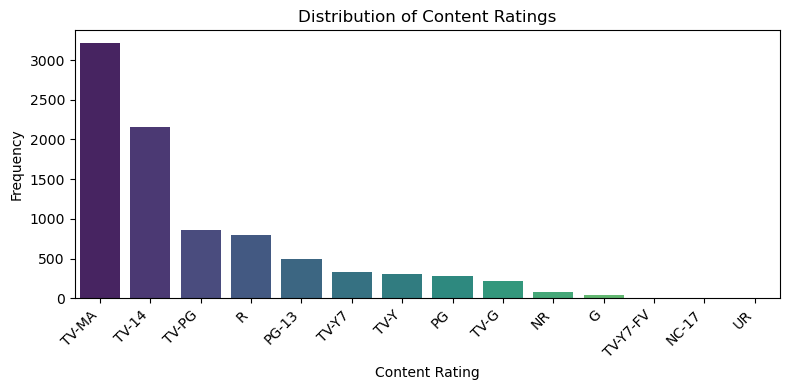

In [38]:
import seaborn as sns

rating_counts = encoded_df['rating'].value_counts()

plt.figure(figsize=(8, 4))
sns.countplot(data=encoded_df, x='rating', order=rating_counts.index, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Content Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Content Ratings')

plt.tight_layout()
plt.show()

In [40]:
encoded_df.to_csv("encoded_netflix.csv", index = False)